# **Customer Personality Analysis**

# Importing important Libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [125]:
# Loading the data
main_df = pd.read_excel('marketing_campaign.xlsx')

df = main_df.copy()
main_df.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

In [126]:
# shape of dataset

df.shape

(2240, 29)

In [127]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [128]:
# Finding the number of unique values present in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them

In [129]:
# checking if Nan is present in comlumn or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [130]:
# Checking numbwer of null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- Income column have some missing value in it so we will need to fill it by either mean or median.

<Axes: >

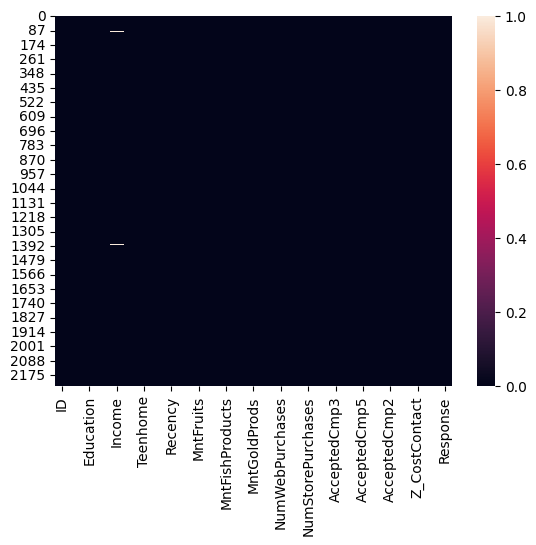

In [131]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [132]:
# Dropping the column beacause they willnot contribute in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"], axis=1)


In [134]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [133]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,20,1,0,0,0,0,0,0


- Let's figure out the number of complains complained by customer and nnumber of responces are positive or negative in last 2 years

Text(0, 0.5, 'Count of Complain')

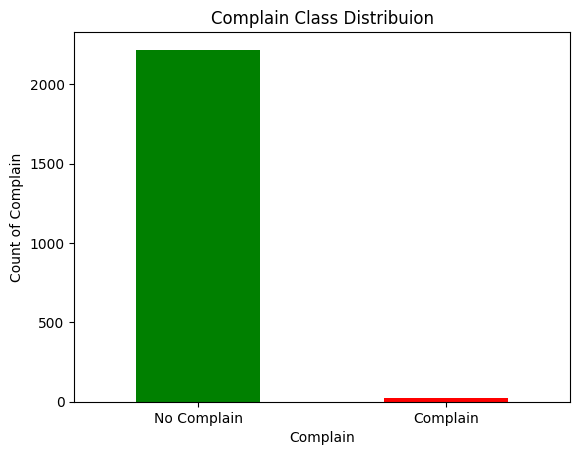

In [135]:
# Complain: 1 if customer complained in the last 2 years, 0 otherwise.

label_complain =['No Complain', 'Complain']

count_complain = pd.value_counts(df['Complain'], sort=True)
count_complain.plot(kind='bar', rot=0, color=['Green','Red'])

plt.title("Complain Class Distribuion")
plt.xticks(range(2), label_complain)
plt.xlabel("Complain")
plt.ylabel("Count of Complain")

- From above image we can say that there are not much complains by customers

In [136]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [137]:
pd.value_counts(df['Complain'], sort=True)

0    2219
1      21
Name: Complain, dtype: int64

In [138]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Text(0, 0.5, 'Count of Response')

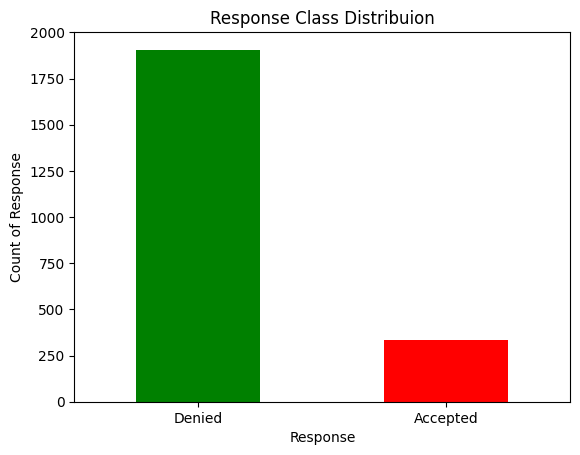

In [139]:
# let's check about response

# Response: 1 if customer accepted the offer in the last 2 campaign, 0 otherwise

label_response = ['Denied', 'Accepted']

count_response = pd.value_counts(df['Response'], sort=True)

count_response.plot(kind='bar', rot=0, color=['Green','Red'])

plt.title("Response Class Distribuion")
plt.xticks(range(2), label_response)
plt.xlabel("Response")
plt.ylabel("Count of Response")

In [140]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

- This graph shows that last the offer has beemn denied by most of the customers

Let's check out all campaign offers

- AcceptedCmp1: 1. if customer accepted the offer in the 1st campaign, 0 otherwise

- AcceptedCmp2: if customer accepted the offer in the 2nd campaign, 0 otherwise

- AcceptedCmp3: if customer accepted the offer in the 3rd campaign, 0 otherwise

- AcceptedCmp4: if customer accepted the offer in the 4th campaign, 0 otherwise

- AcceptedCmp5: if customer accepted the offer in the 5th campaign, 0 otherwise

- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Text(0, 0.5, 'Count of AcceptedCmp1')

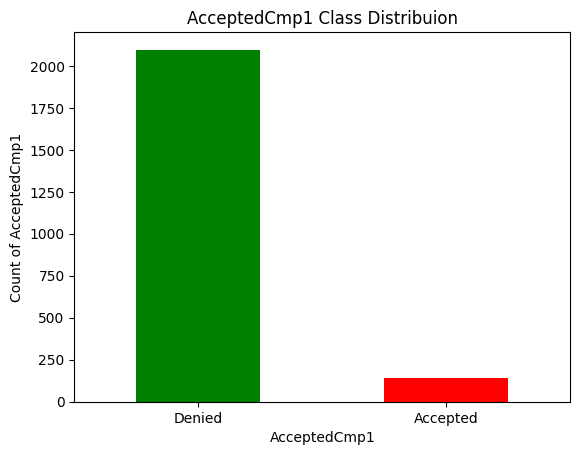

In [141]:
# Campaign 1
label_c1 =['Denied', 'Accepted']


count_c1 = pd.value_counts(df['AcceptedCmp1'], sort=True)

count_c1.plot(kind='bar', rot=0, color=['Green','Red'])

plt.title("AcceptedCmp1 Class Distribuion")
plt.xticks(range(2), label_response)
plt.xlabel("AcceptedCmp1")
plt.ylabel("Count of AcceptedCmp1")

In [142]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

Text(0, 0.5, 'Count of AcceptedCmp2')

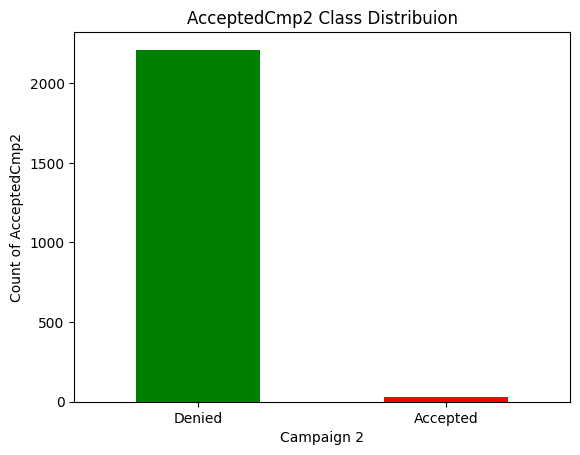

In [143]:
# Campaign 2

label_c2 =["Denied", "Accepted"]

count_c2 = pd.value_counts(df['AcceptedCmp2'], sort=True)

count_c2.plot(kind='bar', rot=0, color=['Green', 'Red'])

plt.title("AcceptedCmp2 Class Distribuion")
plt.xticks(range(2), label_response)
plt.xlabel("Campaign 2")
plt.ylabel("Count of AcceptedCmp2")

In [144]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

Text(0, 0.5, 'Count of AcceptedCmp3')

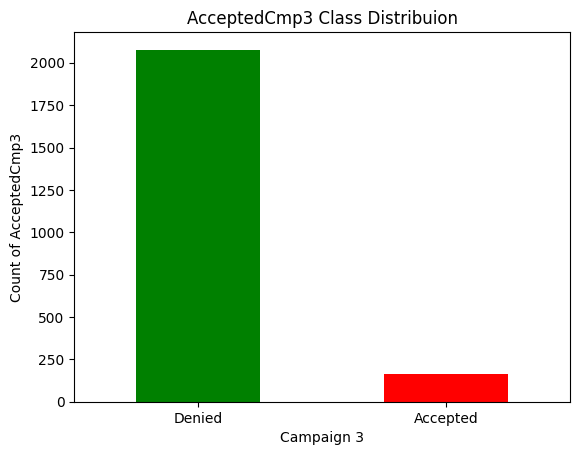

In [145]:
# Campaign 3
label_c3 =["Denied", "Accepted"]

count_c3 = pd.value_counts(df['AcceptedCmp3'], sort=True)

count_c3.plot(kind='bar', rot=0, color=['Green', 'Red'])

plt.title("AcceptedCmp3 Class Distribuion")
plt.xticks(range(2), label_response)
plt.xlabel("Campaign 3")
plt.ylabel("Count of AcceptedCmp3")

In [146]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

Text(0, 0.5, 'Count of AcceptedCmp4')

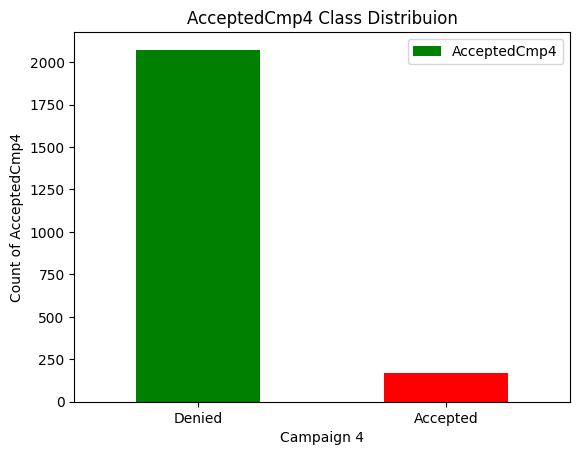

In [147]:
# Campaign 4
label_c4 =["Denied", "Accepted"]

count_c4 = pd.value_counts(df['AcceptedCmp4'], sort=True)

count_c4.plot(kind='bar', rot=0, color=['Green', 'Red'], legend=True)

plt.title("AcceptedCmp4 Class Distribuion")
plt.xticks(range(2), label_c4)
plt.xlabel("Campaign 4")
plt.ylabel("Count of AcceptedCmp4")


In [148]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

- From the above figures we clearly see that most of offers has been denied by customers in all campaigns

- But Campaign 4 had better amount of acceptance.
- Campaign 4 > Campaign 3 > Campaign1 > Campaign 2 ; Comparison of acceptance in campaigns.

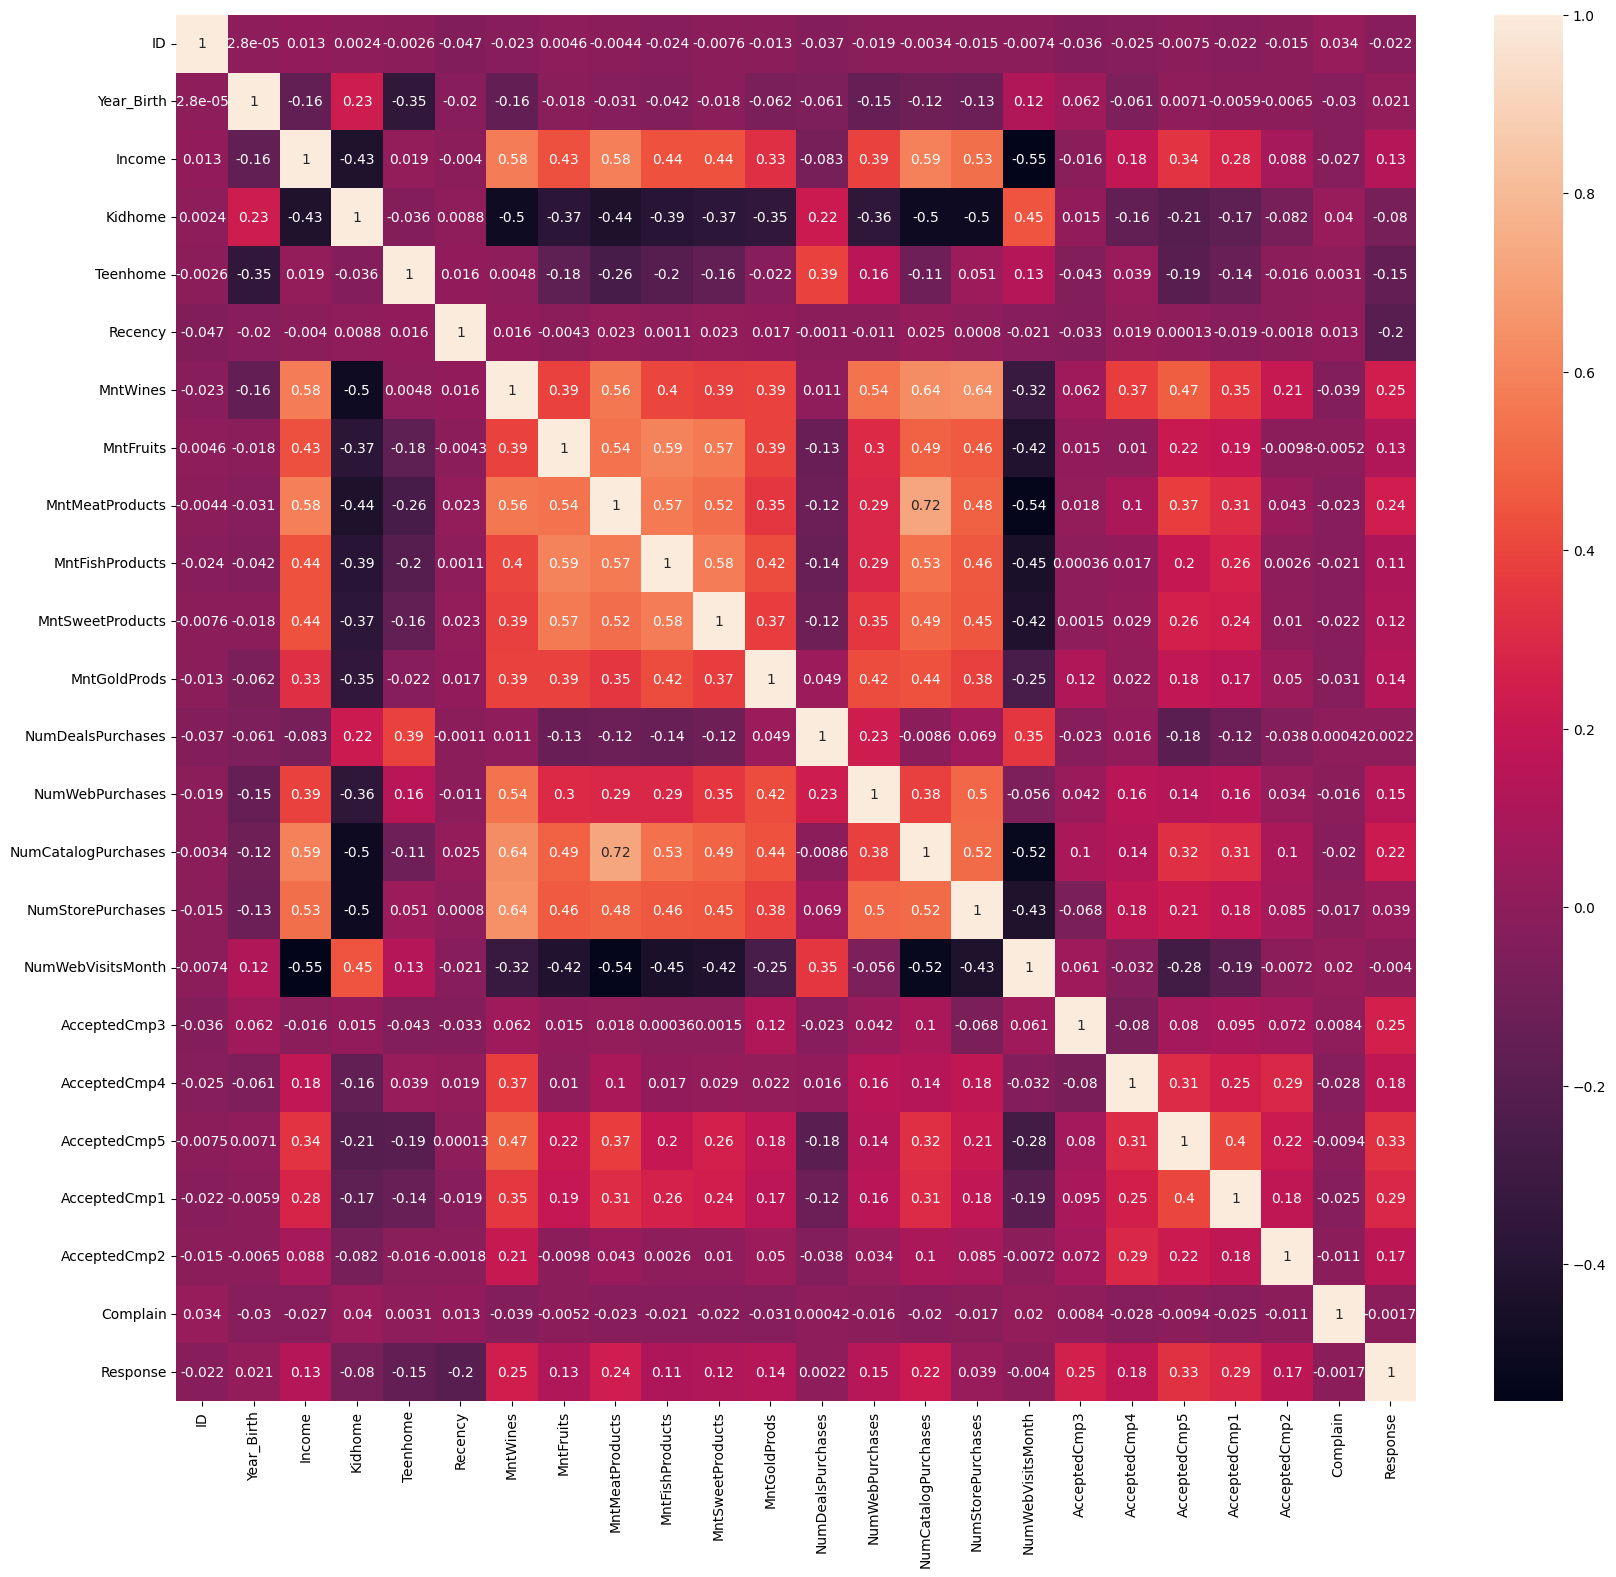

In [149]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

- No two columns are too much correlated with each other so we can't drop any columns

# **Data Preprocessing**

In [150]:
# Filling the missing value in the income by 'mean'

df['Income'] = df['Income'].fillna(df['Income'].mean())

In [80]:
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [151]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

- No Null value in the dataset

In [152]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [153]:
# Checking the number of unique categories present in the "Marital_Status"

df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [154]:
df["Marital_Status"] = df["Marital_Status"].replace(['Married', 'Together'], 'relationship')
df["Marital_Status"] = df["Marital_Status"].replace(['Divorced', 'Widow','Alone','Absurd','YOLO'], 'Single')

- In the above cell we are grouping 'Married','Together', as 'relationship'

- Whereas 'Divorced', 'Widow','Alone','Absurd','YOLO' as 'Single'

In [155]:
df["Marital_Status"].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

Text(0, 0.5, 'Count of Married_Status')

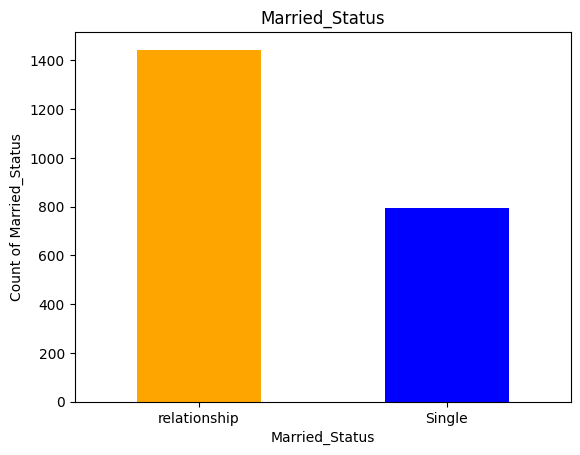

In [156]:
# Relationship vs Single

label_status =["relationship", "Single"]

count_status = pd.value_counts(df['Marital_Status'], sort=True)
count_status.plot(kind='bar', rot=0, color=['Orange','Blue'])

plt.title("Married_Status")
plt.xticks(range(2), label_status)
plt.xlabel("Married_Status")
plt.ylabel("Count of Married_Status")

In [157]:
# Combining different dataframes into a single column to reduce the number of dimension

In [158]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [159]:
df['Kids']= df['Kidhome']+df['Teenhome']

In [160]:
df['Expenses']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [161]:
df['TotalAcceptedCmp']=df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [162]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [163]:
#saving the data for tableau

df.to_csv('data_visuals.csv')

In [164]:
# Deleting some column to reduce dimension and complexity of model


col_del= ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',"Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
len(col_del)

df=df.drop(columns=col_del, axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,2013-08-21,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,2014-02-10,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,2014-01-19,94,0,1,422,0,19


In [165]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Complain', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [166]:
# Adding 'Age' column

df['Age'] = 2024 - df['Year_Birth']


In [167]:
df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

In [168]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [169]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [170]:
# Changing category into US and PG only.

df['Education']=df['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'master'], 'PG')
df['Education']=df['Education'].replace(['Basic'], 'UG')

In [171]:
df['Education'].value_counts()

PG        1816
Master     370
UG          54
Name: Education, dtype: int64

In [172]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Complain', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Age'],
      dtype='object')

In [173]:
# Number of days customer was engaged with company

# Changing bt_customer into timestamp format

df['Dt_Customer'] =pd.to_datetime(df.Dt_Customer)
df["first_day"] = '01-01-2024'
df['first_day']= pd.to_datetime(df.first_day)
df["day_engaged"] = (df['first_day']-df['Dt_Customer']).dt.days
df["day_engaged"]

0       4136
1       3586
2       3785
3       3612
4       3634
        ... 
2235    3854
2236    3492
2237    3628
2238    3629
2239    4095
Name: day_engaged, Length: 2240, dtype: int64

In [174]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [175]:
df.Dt_Customer

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [176]:
df.shape

(2240, 15)

In [177]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Complain', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', 'first_day',
       'day_engaged'],
      dtype='object')

In [178]:
df = df.drop(columns=["ID","Dt_Customer","first_day",'Year_Birth',"Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [179]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,PG,Single,58138.0,0,1617,1,25,67,4136
1,PG,Single,46344.0,2,27,0,6,70,3586
2,PG,relationship,71613.0,0,776,0,21,59,3785
3,PG,relationship,26646.0,1,53,0,8,40,3612
4,PG,relationship,58293.0,1,422,0,19,43,3634


# **Data Visualization**

In [181]:
fig = px.bar(df,x="Marital_Status", y='Expenses', color='Education')
fig.show()

In [182]:
fig = px.bar(df,x="Marital_Status", y='Expenses', color='Marital_Status')
fig.show()

In [183]:
# Less number of single customer

fig = px.histogram(df, x='Expenses', facet_row="Marital_Status", template='plotly_dark')
fig.show()

In [184]:
# Education
fig = px.histogram(df, x='Expenses', facet_row="Education", template='plotly_dark')
fig.show()

In [185]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', 'day_engaged'],
      dtype='object')

In [186]:
# x='NumTotalPurchases', facet_row="Education"

fig = px.histogram(df, x='NumTotalPurchases', facet_row="Education", template='plotly_dark')
fig.show()

In [187]:
# x='Age', facet_row="Marital_Status"
fig = px.histogram(df, x='Age', facet_row="Marital_Status", template='plotly_dark')
fig.show()

In [188]:
#  x='Income', facet_row="Marital_Status"
fig = px.histogram(df, x='Income', facet_row="Marital_Status", template='plotly_dark')
fig.show()

In [189]:
fig = px.pie(df,names="Marital_Status", hole=0.4, template='gridon')
fig.show()

35 % of the Customer are single whereas more 64% are in relationship

In [191]:
fig = px.pie(df,names="Education", hole = 0.4, template= "plotly_dark")
fig.show()

- More than 97% customer are from PG background and Approx. 2% are from UG.

Text(0.5, 1.0, 'Total expense based on the education level')

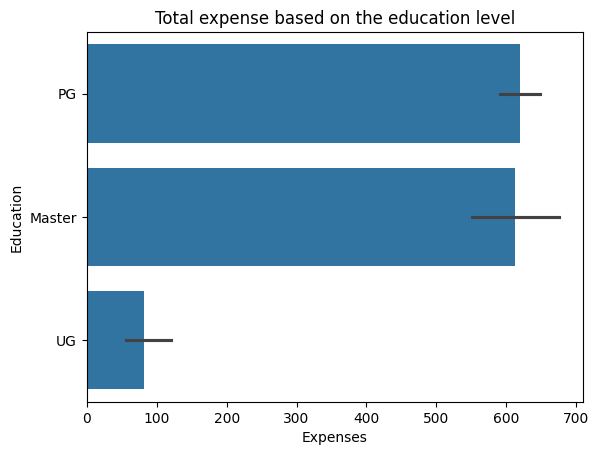

In [192]:
sns.barplot(x=df['Expenses'], y=df['Education'])
plt.title("Total expense based on the education level")

Text(0.5, 1.0, 'Total Income based on the education level')

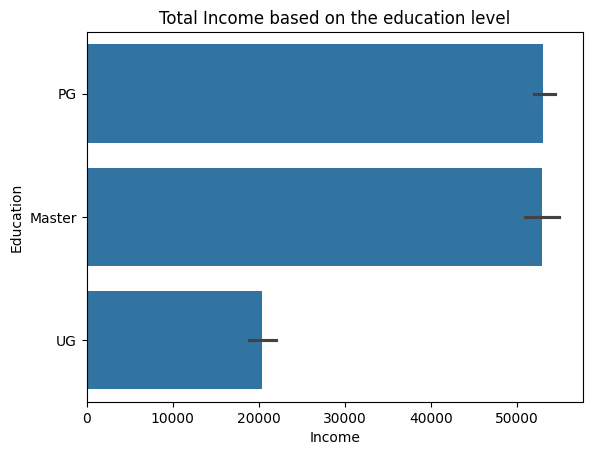

In [193]:
sns.barplot(x=df['Income'], y=df['Education'])
plt.title("Total Income based on the education level")

In [202]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,55.194196,3826.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,28.000000,3473.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,47.000000,3653.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,54.000000,3828.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,65.000000,4002.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,131.000000,4172.000000


<Axes: >

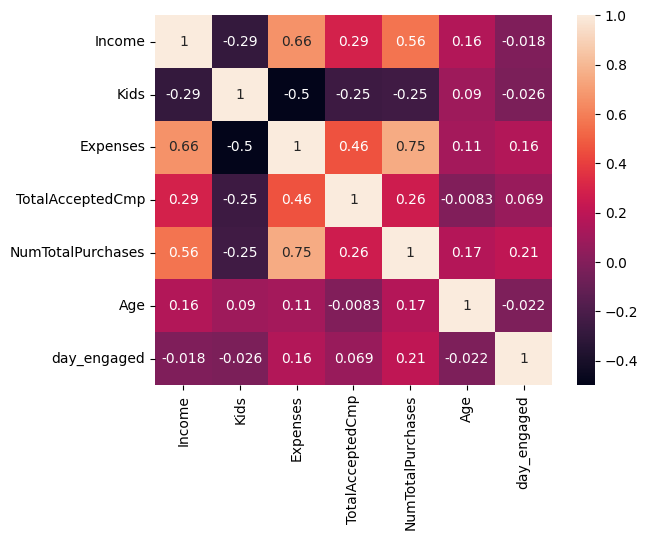

In [203]:
sns.heatmap(df.corr(), annot=True)

In [205]:
# Find out object type columns = Categorical columns

obj=[]

for i in df.columns:
  if(df[i].dtypes=='object'):
    obj.append(i)

print(obj)

['Education', 'Marital_Status']


In [206]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

In [207]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [208]:
lbl_encode = LabelEncoder()

for i in obj:
  df[i] =df[[i]].apply(lbl_encode.fit_transform)
  print( df[i])

0       1
1       1
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    1
Name: Education, Length: 2240, dtype: int64
0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Marital_Status, Length: 2240, dtype: int64


In [209]:
# After label encoding
df['Education'].value_counts()

1    1816
0     370
2      54
Name: Education, dtype: int64

In [210]:
df['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

In [212]:
df1=df.copy()
df1.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,1,0,58138.0,0,1617,1,25,67,4136
1,1,0,46344.0,2,27,0,6,70,3586
2,1,1,71613.0,0,776,0,21,59,3785
3,1,1,26646.0,1,53,0,8,40,3612
4,1,1,58293.0,1,422,0,19,43,3634


# **Standardization**

In [213]:
from sklearn.preprocessing import StandardScaler

In [216]:
scaled_features = StandardScaler().fit_transform(df1.values)

scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns= df1.columns)

In [217]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0.342769,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,0.342769,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,0.342769,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,0.342769,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,0.342769,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012
